# 1. K-NN classifier


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

# 2. Data loading and analysis of the attributes
 
#### 2.1. Dataset load.

In [ ]:
def read_data(path):
    df = pd.read_csv(path, sep=",")
    return df.drop(["quality"],axis=1),df["quality"].tolist()

data_X, data_Y = read_data("winequality-red.csv")

In [ ]:
data_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


#### 1.2. Analyse. 

Histogram of the assigned class.


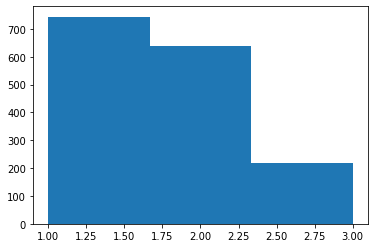

In [ ]:
plt.hist(data_Y, bins=3)
plt.show()

Plot the histograms of the first 5 attributes. 

fixed acidity


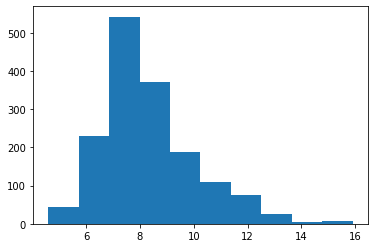

volatile acidity


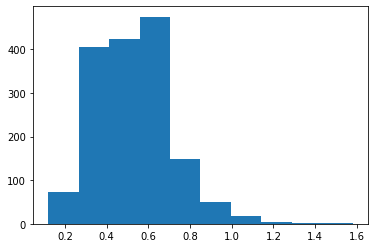

citric acid


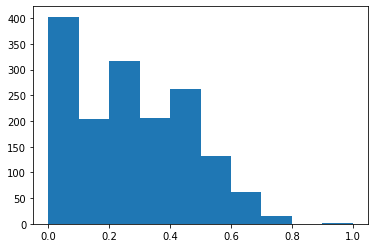

residual sugar


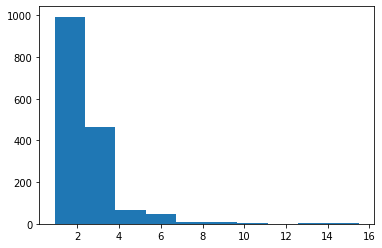

chlorides


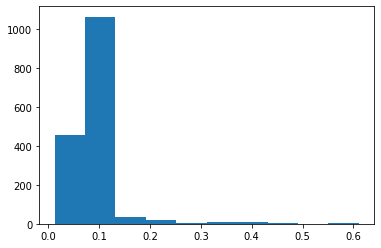

In [ ]:
for col in data_X.columns[:5]:
  print(col)
  plt.hist(data_X[col])
  plt.show()

# 3. Train and test set selection

In [ ]:
def split_data(data_X, data_Y, test_percent = 15, random_state=5):
    X_train, X_test, y_train, y_test = train_test_split(data_X,
                                                        data_Y,
                                                        test_size=test_percent/100,
                                                        random_state=random_state)
    train_X = pd.DataFrame(X_train)
    test_X = pd.DataFrame(X_test)

    return (train_X, y_train, test_X, y_test)
    
(train_X, train_Y, test_X, test_Y) = split_data(data_X, data_Y)
print("rows in train set: ", train_X.shape[0])
print("rows in test set:", test_X.shape[0])

rows in train set:  1359
rows in test set: 240


# 4. Data standarization/normalization
#### 4.1. Cassification accuracy with k-nn algorithm.

In [ ]:
def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k = 3):
    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(train_data_X, train_data_Y)
    prediction = neigh.predict(test_data_X)
    accuracy = metrics.accuracy_score(test_data_Y, prediction)

    return accuracy

get_classification_accuracy(train_X, train_Y, test_X, test_Y)

0.6375

#### 4.2.Standarization and repeated classification.

In [ ]:
def standarize_train_and_test(train_X, test_X, standarizer):
    norm_train = standarizer.fit_transform(train_X)
    norm_test = standarizer.transform(test_X)
    return pd.DataFrame(norm_train), pd.DataFrame(norm_test)

norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X, preprocessing.StandardScaler())
get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y)

0.6416666666666667

# 5. K value

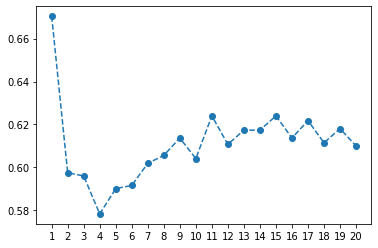

In [ ]:
from sklearn.model_selection import cross_validate

y = []
k_range = range(1,21)
cv_folds = 5
for k in k_range:
  cv_results = cross_validate(KNeighborsClassifier(n_neighbors = k), norm_train_X, train_Y, cv = cv_folds, scoring = 'accuracy')
  avg_accuracy = sum(cv_results['test_score'])/cv_folds
  y.append(avg_accuracy)

plt.plot(k_range, y, marker='o', linestyle='dashed')
plt.xticks(k_range)
plt.show()

# 6. Testing classifier
Train the k-NN classifier again and test it using the obtained best k value on a test set to check the final classification accuracy. You can just call the previous written function get_classification_accuracy)

In [ ]:
get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y)

0.6416666666666667